<div align=center>
		
<p></p>
<p></p>
<font size=5>
<font/>
<p></p>
 <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Department of Computer Engineering
</font>
<p></p>
<font color=blue>
Artificial Intelligence
</font>
<br/>
<br/>
Spring 2023

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Practical Assignment 7 (Naive Bayes & Logistic Regression)
			</font>
    <br/>
                <br/>
    </div>

The implementation of Naive Bayes and Logistic Regression is supposed to be from scratch.

# Naive Bayes (50)

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots, x_n \mid y)} {P(x_1, \dots, x_n)}$

$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y)$

$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}{P(x_1, \dots, x_n)}$

$\begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y)\end{aligned}\end{align}$

In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters. 

Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This in turn helps to alleviate problems stemming from the curse of dimensionality.

On the flip side, although naive Bayes is known as a decent classifier, it is known to be a bad estimator, so the probability outputs are not to be taken too seriously.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import math
from math import sqrt
np.random.seed(123)

### Dataset
Load the given dataset. The last column contains the labels. 

Preprocess if needed.

In [2]:
data = np.loadtxt("data.txt", usecols=[0, 1], dtype=float)
labels = np.loadtxt("data.txt", usecols=2, dtype=int)

Consider the values of each class. Create a dictionary for the dataset, with classes as keys and the entries of the dataset as values.

In [3]:
def create_class_dictionary(data, labels):
    class_dict = dict()
    class_dict.update({0: list()})
    class_dict.update({1: list()})
    for i in range(len(labels)):
        if labels[i] == 0:
            class_dict[0].append(data[i])
        else:
            class_dict[1].append(data[i])
    return class_dict

For the dataset dictionary, find the mean and standard deviation of all classes. The output format should be a list of two lists, the first one the mean and standard deviation of the first column and the second one is for the second column.

In [4]:
def standard_deviation(arr):
    mean = np.mean(arr)
    var = sum([pow(x - mean, 2) for x in arr]) / float(len(arr) - 1)
    var = pow(var, 0.5)
    return var

def info(arr):
    tmp = []
    for col in zip(*arr):
        mean = np.mean(col)
        var = standard_deviation(col)
        tmp.append((mean, var))
    return tmp

In [5]:
def class_info(class_dictionary):
    class_info_dict = dict()
    class_info_dict.update({0: list()})
    class_info_dict.update({1: list()})
    for c in class_dictionary:
        class_info_dict[c] = info(class_dictionary[c])
    return class_info_dict

print(class_info(create_class_dictionary(data, labels)))

{0: [(-0.0058601171875000005, 0.0993385362029123), (0.0019293359375000003, 0.10108894914037693)], 1: [(-0.0017408606557377047, 0.10225286340847922), (0.004170553278688526, 0.10882725841643064)]}


### Visualization
Use the imported libraries to visualize the given data. 

Why is the info step valid in this dataset? 

What is the type of this dataset's distribution? With other distribution types, what action would be needed to obtain the mean and standard variation info?

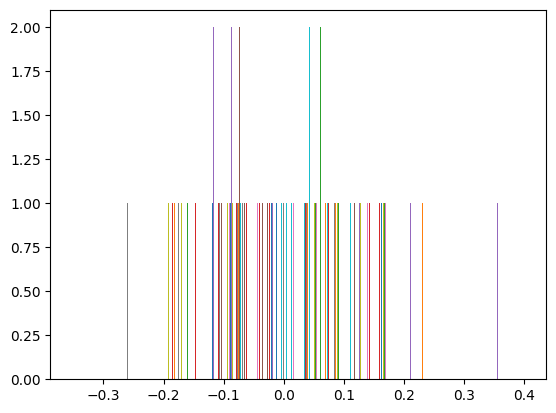

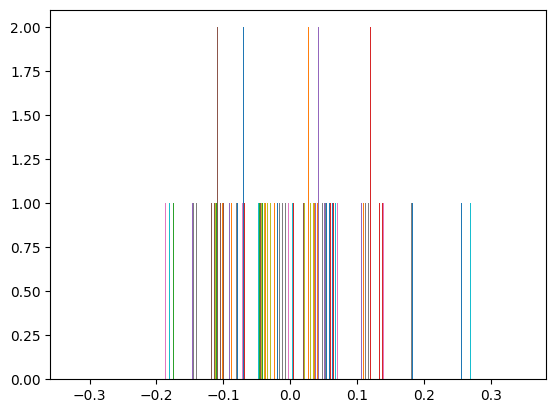

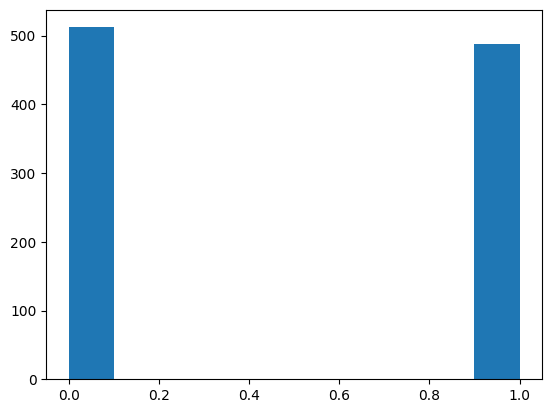

In [6]:
def plotter(plot_x, bins):
    plt.hist(plot_x, bins)
    plt.show()

plotter(create_class_dictionary(data,labels)[0], 10)
plotter(create_class_dictionary(data,labels)[1], 10)
plotter(labels, 10)

### Model Details

As explained above, to create this model, you need a prior function and a likelihood function.

In the likelihood function, you need to calculate the probability of the query belonging to a class. 

In [7]:
def prior(class_dictionary, labels):
    priors = dict()
    iter = np.unique(labels)
    for out in iter:
        priors[out] = sum(labels == out) / len(labels)
    return priors

In [8]:
def likelihood(class_dictionary, query):
    probabilities = dict()
    probabilities.update({0: 1})
    probabilities.update({1: 1})
    information = class_info(class_dictionary)
    for class_value, row in information.items():
        prob1 = (1 / (pow(2 * math.pi, 0.5) * row[0][1])) * math.exp(-(pow(query[0] - row[0][0], 2) / (2 * pow(row[0][1], 2))))
        prob2 = (1 / (pow(2 * math.pi, 0.5) * row[1][1])) * math.exp(-(pow(query[1] - row[1][0], 2) / (2 * pow(row[1][1], 2))))
        probabilities[class_value] *= prob1
        probabilities[class_value] *= prob2

    return probabilities

### Predict


In [9]:
def predict(data, labels, query):
    class_dictionary = create_class_dictionary(data, labels)
    probabilities = likelihood(class_dictionary, query)
    best_label, best_prob = None, -1
    for class_value, probability in probabilities.items():
        if best_label is None or probability > best_prob:
            best_prob = probability
            best_label = class_value
    return best_label

In [10]:
def NB(data, labels, queries):
    predictions = list()
    for row in queries:
        predictions.append(predict(data, labels, row))
    return predictions

### Test
To test the model, import a suitable dataset from sklearn library to check the accuracy of your model. Then import GaussianNB from sklearn and compare your model's result with it.

In [11]:
def train_test_split(data, labels, test_size):
    train_size_X = int(test_size * len(data))
    train_size_Y = int(test_size *  len(labels))
    return data[0:train_size_X], labels[0:train_size_Y], data[train_size_X:len(data)], labels[train_size_Y:len(labels)]

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

def accuracy(ground_truth, predictions):
    return accuracy_score(ground_truth, predictions)

result = train_test_split(data, labels, 0.75)
trained_NB = NB(result[0], result[1],  result[2])
print(accuracy(result[3], trained_NB))


Gauss_NB = GaussianNB()
Gauss_NB.fit(result[0], result[1])
print(accuracy(result[3], Gauss_NB.predict(result[2])))

0.528
0.524


# Linear Regression (35)

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

Ordinary least squares Linear Regression.

LinearRegression from sklearn.linear_model fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In this section, you will implement a simple linear regression model using sklearn. Only the first feature of the diabetes dataset is required for this part.

In [13]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import datasets, linear_model

In [14]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X = diabetes_X[:, np.newaxis, 2]

Split the data into training and testing sets.

In [15]:
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

Create the model using sklearn. Then train it using the training set.

In [16]:
model = linear_model.LinearRegression()
model.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

Make predictions for the test set.

In [17]:
diabetes_y_pred = model.predict(diabetes_X_test)
print("Predictions: \n", diabetes_y_pred)
print("Coefficients: \n", model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Predictions: 
 [225.9732401  115.74763374 163.27610621 114.73638965 120.80385422
 158.21988574 236.08568105 121.81509832  99.56772822 123.83758651
 204.73711411  96.53399594 154.17490936 130.91629517  83.3878227
 171.36605897 137.99500384 137.99500384 189.56845268  84.3990668 ]
Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


Visualize your predictions and compare them to ground truth using the imported libraries.

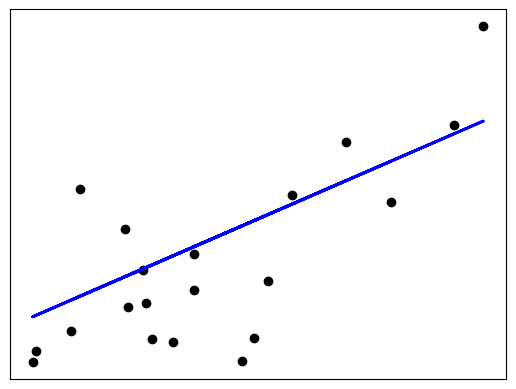

In [18]:
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=2)
plt.xticks(())
plt.yticks(())
plt.show()


<b>NOTICE:
in ghesmat tamaman dar site zekr shode mojood ast va az anjaei ke khaste shode ta az library haye zekr shode estefade shavad, tagheir ziadi dar code nemitavan dad banabarin momken ast ba sayer daneshjooyan  shebahat dashte bashad.<b/>


# Logistic Regression (15 + 50)

This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables.

$S(h(x)) = \frac{1}{1 + e^{-(\theta_0 + \theta_1 x_1 + \theta_1 x_2 + \cdots + \theta_n x_n})} = \frac{1}{1 + e^{-\theta^T x}} \tag{2}$

The sigmoid function is of importance here and is defined as:

$S(x) = \frac{1}{1 + e^{-x}}$






Calculate the sigmoid function and visualize it.

In [19]:
def sigmoid(x):
    return 1. / (np.exp(-x) + 1.)

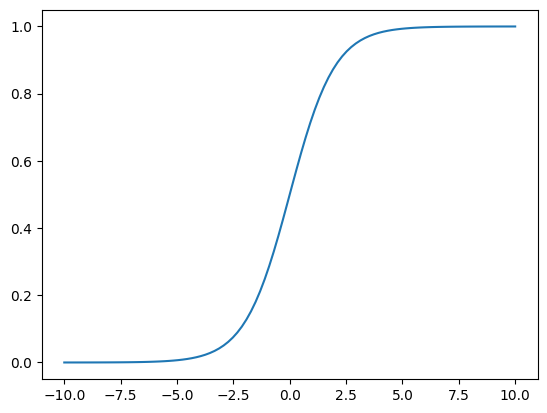

In [20]:
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.show()

#Dataset
Load the given dataset (same as naive bayes). Add a new column at the end of the dataset containing only 1s.

In [21]:
data = np.loadtxt("data.txt", usecols=[0, 1], dtype=float)
B = np.array([[1.] for _ in range(len(data))])
data = np.hstack((data, B))
labels = np.loadtxt("data.txt", usecols=2, dtype=int)

### Predictions

Simply implement the math above to make predictions. Since we are using numbers here, define the threshold of 0.5 for classification.

In [22]:
def prediction(weights, x):
    threshold = 0.5
    y_hat = sigmoid(np.dot(x, weights))
    y_hat[y_hat < threshold] = 0
    y_hat[y_hat >= threshold] = 1
    return y_hat

### Loss Function
Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0.

In binary classification, where the number of classes M
 equals 2, cross-entropy can be calculated as:

$−(ylog(p)+(1−y)log(1−p))$


In [23]:
def cross_entropy(y_true, y_pred):
    return -y_true * np.log2(y_pred) - (1. - y_true) * np.log2(1. - y_pred)

### Gradient Descent

Gradient Descent is an optimization algorithm for finding a local minimum of a differentiable function. Gradient descent in machine learning is simply used to find the values of a function's parameters (coefficients) that minimize a cost function as far as possible.

$\theta := \theta - \alpha \nabla_\theta H \tag{6}$

In [24]:
def gradient_descent(X, y, weight, num_of_epochs, learning_rate = 0.005):
    while num_of_epochs:
        z_hat = prediction(weight, X) - y
        X_t = np.matrix.transpose(X)
        weight -= learning_rate * np.dot(X_t, z_hat)
        num_of_epochs -= 1
    return weight

In [25]:
def LR(train_set, labels, test_set, num_of_epochs, learning_rate = 0.005):
    weight = np.array([[0.0], [0.0], [0.0]])
    for i in range(3):
        weight[i][0] = np.random.random()
    weight = gradient_descent(train_set, labels, weight, num_of_epochs)
    return prediction(weight, test_set)

### Test

To test the model, import a suitable dataset from sklearn library to check the accuracy of your model. Then import LogisticRegression from sklearn and compare your model's result with it.



In [26]:
def accuracy(ground_truth, predictions):
    return accuracy_score(ground_truth, predictions)

train_size = int(0.85 * len(data))
x_train = data[0:train_size]
y_train = np.array(labels[0:train_size]).reshape(train_size, 1)
x_test = data[train_size:len(data)]
y_test = np.array(labels[train_size:len(data)]).reshape(len(data) - train_size, 1)
final_prediction = list(LR(x_train, y_train, x_test, len(data)))
print(accuracy(y_test, final_prediction))


from sklearn.linear_model import LogisticRegression
y_train = y_train.ravel()
model = LogisticRegression().fit(x_train, y_train)
print(model.score(x_test, y_test))

0.5
0.5


### Visualization

During your model's training, save the accuracy and loss of each epoch, and then plot them using the imported libraries. Explain the pattern. If the result is not satisfactory, change the learning rate, num of epochs, initial weights, etc and observe their effects on the result.

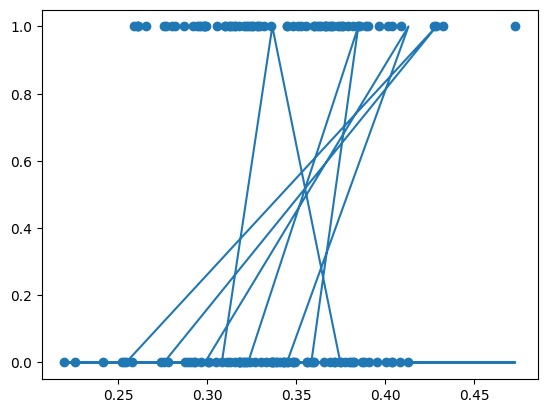

In [27]:
tmp = [[0.0] for _ in range(len(data) - train_size)]
tmp = np.array(tmp)
for i in range(len(data) - train_size):
    tmp[i] = np.mean(x_test[i])

model_prediction = list(model.predict(x_test))
plt.scatter(tmp, y_test)
plt.plot(tmp, model_prediction)
plt.show()